#Importing the Relevant Libraries

In [6]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

#Loading the Raw Data

In [8]:
data = pd.read_csv("1.04.+Real-life+example.csv")
raw_data = data.copy()
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


#Preprocessing

Exploring the descriptive statistics of the variables

In [10]:
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


Determining the variables of interest

In [11]:
raw_data = raw_data.drop(['Model'], axis=1)
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


Dealing with missing values

In [13]:
raw_data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [14]:
raw_data = raw_data.dropna(axis=0)

In [15]:
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


#Exploring the PDFs

<ipython-input-16-e01d7dda8ede>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(raw_data['Price'])


<Axes: xlabel='Price', ylabel='Density'>

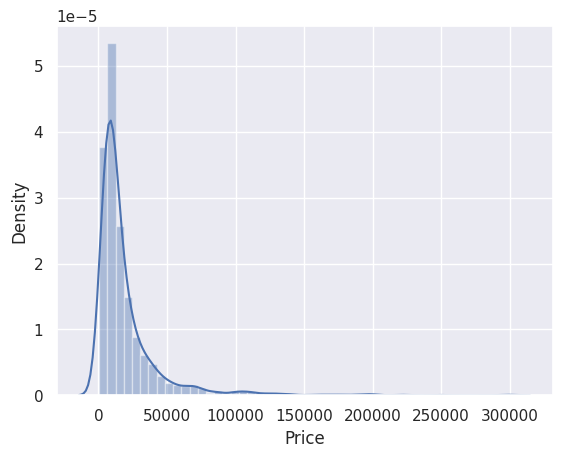

In [16]:
sns.distplot(raw_data['Price'])

#Dealing with Outliers

In [17]:
df = raw_data[raw_data['Price']<raw_data['Price'].quantile(0.99)]
df.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


<ipython-input-18-87e11caeb2c4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


<Axes: xlabel='Price', ylabel='Density'>

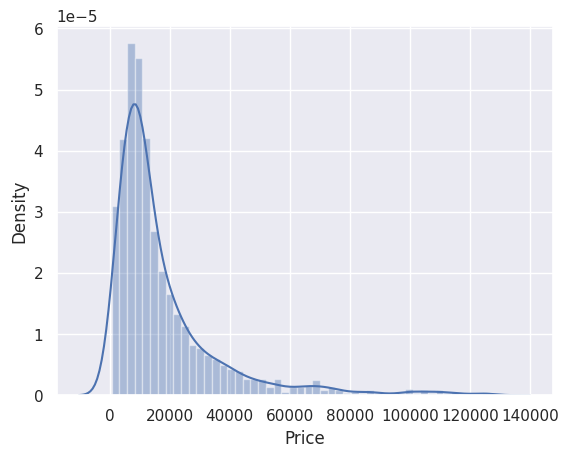

In [18]:
sns.distplot(df['Price'])

In [20]:
df = df[df['Mileage']<df['Mileage'].quantile(0.99)]
df = df[df['EngineV']<6.5]
df = df[df['Year']>df['Year'].quantile(0.01)]
df.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3822,3822.000000,3822,3822.000000,3822.000000,3822,3822,3822.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,841,NaN,1445,NaN,NaN,1784,3466,NaN
mean,NaN,18350.244142,NaN,157.625589,2.451086,NaN,NaN,2006.845369
std,NaN,19141.436556,NaN,92.306757,0.952812,NaN,NaN,5.991698
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7300.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11800.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21900.000000,NaN,221.000000,3.000000,NaN,NaN,2012.000000


In [25]:
data_cleaned = df.reset_index(drop=True)

In [26]:
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3822,3822.000000,3822,3822.000000,3822.000000,3822,3822,3822.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,841,NaN,1445,NaN,NaN,1784,3466,NaN
mean,NaN,18350.244142,NaN,157.625589,2.451086,NaN,NaN,2006.845369
std,NaN,19141.436556,NaN,92.306757,0.952812,NaN,NaN,5.991698
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7300.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11800.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21900.000000,NaN,221.000000,3.000000,NaN,NaN,2012.000000


#Checking the OLS assumptions

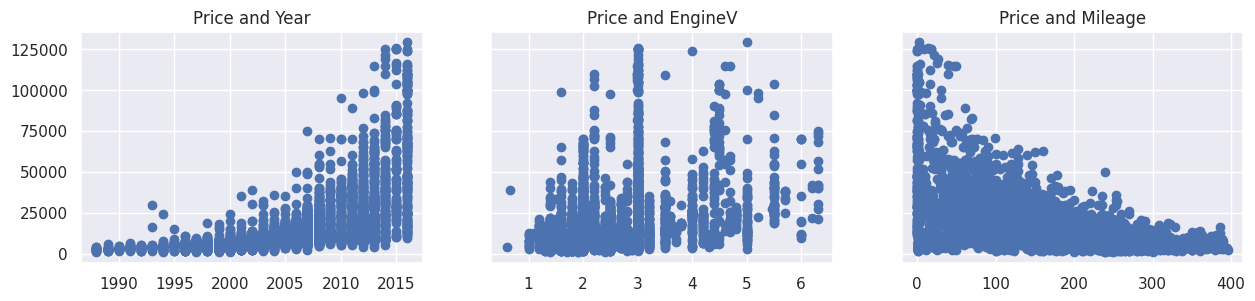

In [27]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('Price and Mileage')


plt.show()

<ipython-input-28-f766034765e6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_cleaned['Price'])


<Axes: xlabel='Price', ylabel='Density'>

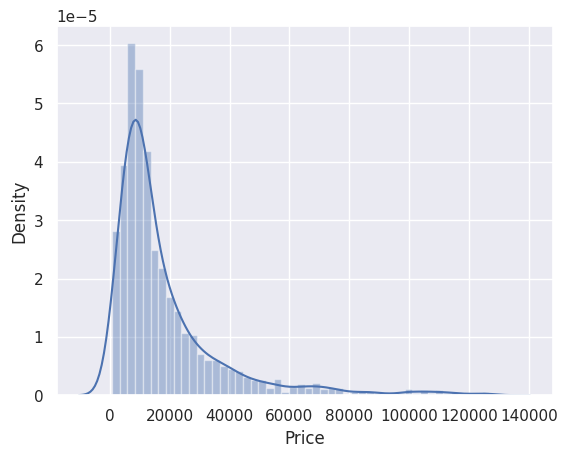

In [28]:
sns.distplot(data_cleaned['Price'])

Relaxing the assumptions

In [29]:
log_price = np.log(data_cleaned['Price'])

# Then we add it to our data frame
data_cleaned['log_price'] = log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
2,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
3,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
4,Audi,14200.0,vagon,200,2.7,Diesel,yes,2006,9.560997
...,...,...,...,...,...,...,...,...,...
3817,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,9.350102
3818,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
3819,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,11.736069
3820,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557


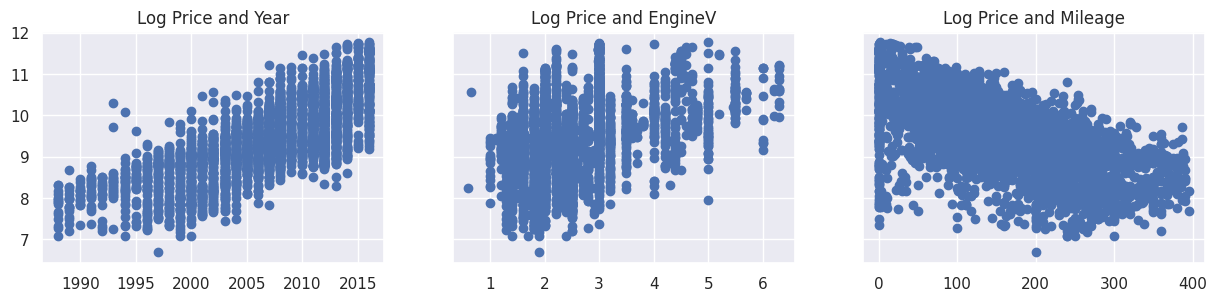

In [30]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('Log Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set_title('Log Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax3.set_title('Log Price and Mileage')


plt.show()

In [31]:
data_cleaned = data_cleaned.drop(['Price'],axis=1)

#Multicollinearity

In [32]:
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = data_cleaned[['Mileage','Year','EngineV']]

vif = pd.DataFrame()

vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns

In [34]:
vif

,VIF,Features
0,3.889496,Mileage
1,10.391622,Year
2,7.617472,EngineV


In [35]:
data_no_multicollinearity = data_cleaned.drop(['Year'],axis=1)

#Create dummy variables

In [36]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True)

In [37]:
data_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
2,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
4,200,2.7,9.560997,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


Rearrange

In [38]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [39]:
cols = ['log_price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [40]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
2,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
4,9.560997,200,2.7,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


#Linear regression model



Declare the inputs and the targets

In [44]:
targets = data_preprocessed['log_price']

inputs = data_preprocessed.drop(['log_price'],axis=1)

Scale the data

In [45]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [46]:
inputs_scaled = scaler.transform(inputs)

#Train Test Split

In [47]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

#Create the regression

In [48]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [49]:
y_hat = reg.predict(x_train)

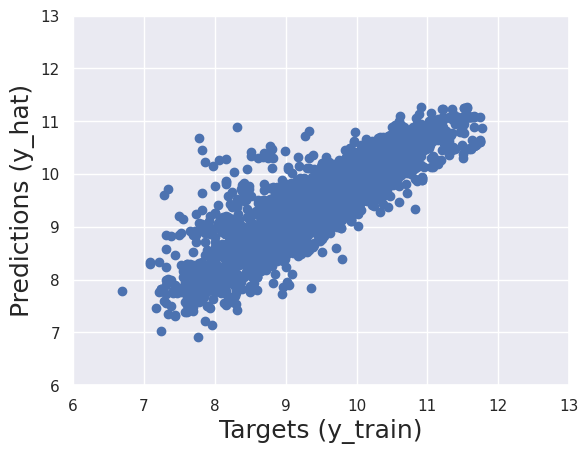

In [50]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

<ipython-input-51-5d6007aa1b3e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train - y_hat)


Text(0.5, 1.0, 'Residuals PDF')

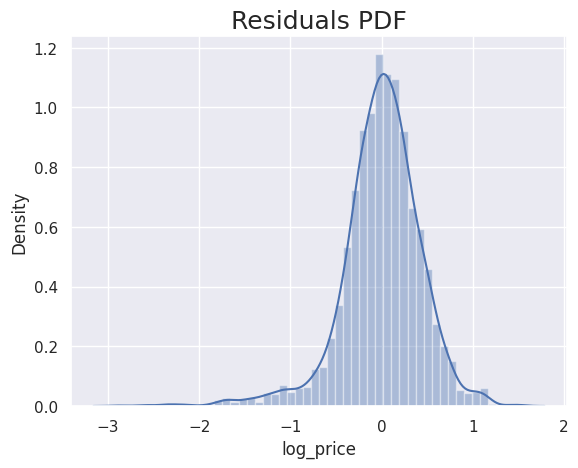

In [51]:

sns.distplot(y_train - y_hat)

plt.title("Residuals PDF", size=18)

In [52]:
reg.score(x_train,y_train)

0.7460799294662706

#Finding the weights and bias

In [53]:
reg.intercept_

9.427755391169864

In [54]:
reg.coef_

array([-0.44597919,  0.21770617,  0.01848487,  0.00563234, -0.13633026,
       -0.18048779, -0.057166  , -0.09418362, -0.1428603 , -0.09735312,
       -0.19246422, -0.11794504, -0.15664088, -0.12563468, -0.02465025,
       -0.14713054,  0.31158331])

In [55]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.445979
1,EngineV,0.217706
2,Brand_BMW,0.018485
3,Brand_Mercedes-Benz,0.005632
4,Brand_Mitsubishi,-0.136330
5,Brand_Renault,-0.180488
6,Brand_Toyota,-0.057166
7,Brand_Volkswagen,-0.094184
8,Body_hatch,-0.142860
9,Body_other,-0.097353


In [56]:
data_cleaned['Brand'].unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

#Testing

In [57]:
y_hat_test = reg.predict(x_test)

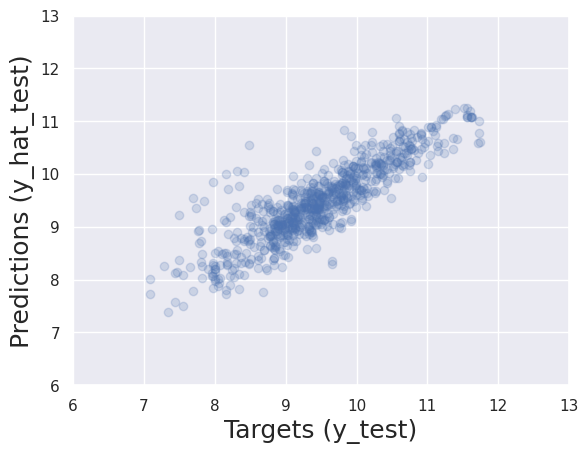

In [58]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [59]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf.head()

,Prediction
0,14356.970798
1,7563.134376
2,45257.315155
3,8343.326571
4,9460.380301


In [60]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,14356.970798,NaN
1,7563.134376,13300.0
2,45257.315155,NaN
3,8343.326571,NaN
4,9460.380301,NaN
...,...,...
760,42440.909272,NaN
761,35353.325656,NaN
762,76502.850120,2550.0
763,46077.091265,NaN


In [61]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,14356.970798,NaN
1,7563.134376,13300.0
2,45257.315155,NaN
3,8343.326571,NaN
4,9460.380301,NaN
...,...,...
760,42440.909272,NaN
761,35353.325656,NaN
762,76502.850120,2550.0
763,46077.091265,NaN


In [62]:
y_test = y_test.reset_index(drop=True)

# Check the result
y_test.head()

0    9.525151
1    9.323669
2    9.928180
3    8.942461
4    9.472628
Name: log_price, dtype: float64

In [63]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,14356.970798,13700.0
1,7563.134376,11200.0
2,45257.315155,20500.0
3,8343.326571,7650.0
4,9460.380301,12999.0
...,...,...
760,42440.909272,42900.0
761,35353.325656,47600.0
762,76502.850120,103999.0
763,46077.091265,66500.0


In [64]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,14356.970798,13700.0,-656.970798,4.795407
1,7563.134376,11200.0,3636.865624,32.472015
2,45257.315155,20500.0,-24757.315155,120.767391
3,8343.326571,7650.0,-693.326571,9.063092
4,9460.380301,12999.0,3538.619699,27.222246
...,...,...,...,...
760,42440.909272,42900.0,459.090728,1.070142
761,35353.325656,47600.0,12246.674344,25.728307
762,76502.850120,103999.0,27496.149880,26.438860
763,46077.091265,66500.0,20422.908735,30.711141


In [65]:
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,765.000000,765.000000,765.000000,765.000000
mean,16897.509069,19047.644523,2150.135454,36.542844
std,13457.375858,19861.668656,10410.232681,62.027649
min,1602.724795,1199.000000,-33692.543693,0.064569
25%,8125.429059,7500.000000,-1955.170777,11.261575
50%,12460.249806,12400.000000,237.110912,22.366511
75%,21282.138629,21950.000000,3834.750729,38.461135
max,76502.850120,125000.000000,84563.445209,701.927994


In [66]:
pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
462,26917.37,26900.00,-17.37,0.06
727,14321.08,14299.00,-22.08,0.15
564,2994.09,3000.00,5.91,0.20
672,10777.02,10800.00,22.98,0.21
581,12970.82,12999.00,28.18,0.22
242,8932.60,8910.53,-22.07,0.25
85,11471.41,11500.00,28.59,0.25
280,7872.60,7900.00,27.40,0.35
391,47240.81,47000.00,-240.81,0.51
669,11636.91,11700.00,63.09,0.54
